# Data Preprocessing

Organize files, unify sample rate, remove silence, and unify audio length

In [51]:
import librosa
import numpy as np
import shutil
import os
from joblib import Parallel, delayed
import multiprocessing 
import matplotlib.pyplot as plt

### Organize Files

In [10]:
us_english=['english1','english10','english100','english102','english103','english104','english106','english107','english109','english114','english116','english117','english118','english121','english123','english124','english126','english127','english128','english131','english133','english135','english137','english138','english139','english142','english143','english146','english147','english149','english15','english150','english151','english155','english157','english158','english16','english160','english161','english162','english163','english165','english166','english167','english168','english169','english17','english170','english171','english173','english175','english176','english177','english178','english179','english18','english180','english181','english182','english184','english186','english187','english189','english19','english190','english191','english192','english193','english195','english197','english198','english199','english20','english200','english201','english202','english203','english204','english205','english207','english208','english21','english211','english212','english213','english214','english216','english218','english219','english220','english222','english223','english229','english23','english231','english232','english234','english235','english236','english237','english242','english244','english245','english246','english248','english249','english25','english251','english252','english254','english256','english257','english26','english260','english261','english262','english263','english264','english265','english266','english27','english272','english273','english275','english276','english277','english278','english281','english282','english283','english284','english286','english288','english289','english290','english292','english293','english297','english303','english307','english311','english313','english314','english315','english316','english317','english32','english321','english325','english326','english327','english328','english329','english33','english330','english332','english333','english335','english336','english337','english339','english34','english340','english341','english342','english343','english344','english345','english346','english347','english349','english35','english351','english355','english357','english36','english360','english361','english369','english371','english372','english373','english375','english376','english377','english378','english379','english380','english381','english382','english383','english384','english385','english386','english387','english388','english389','english39','english390','english391','english392','english393','english394','english395','english396','english397','english398','english399','english406','english408','english411','english412','english414','english415','english419','english422','english423','english424','english425','english426','english427','english428','english429','english431','english433','english434','english435','english437','english438','english44','english441','english442','english443','english444','english445','english446','english447','english449','english45','english451','english453','english454','english455','english457','english458','english459','english46','english461','english462','english463','english466','english468','english469','english47','english474','english475','english476','english477','english479','english480','english481','english482','english483','english485','english49','english492','english493','english494','english495','english497','english499','english5','english50','english501','english502','english504','english506','english508','english509','english51','english510','english511','english512','english514','english515','english516','english517','english520','english521','english522','english523','english524','english525','english526','english527','english528','english529','english53','english530','english531','english532','english533','english534','english535','english536','english537','english538','english539','english54','english540','english541','english544','english545','english546','english547','english55','english550','english551','english552','english553','english554','english555','english556','english558','english559','english560','english561','english562','english563','english564','english565','english567','english568','english570','english571','english572','english573','english575','english576','english577','english59','english6','english60','english62','english63','english65','english66','english67','english68','english7','english70','english71','english74','english75','english76','english78','english79','english81','english82','english83','english86','english88','english89','english9','english90','english92','english93','english94','english95','english96','english97','english98','english99']

In [19]:
shutil.copy('recordings/recordings/'+us_english[0]+'.mp3','recordings/selected_recordings')

'recordings/selected_recordings\\english1.mp3'

In [20]:
for i in us_english:
    shutil.copy('recordings/recordings/'+i+'.mp3','recordings/selected_recordings')

### Silence Removal

#### Singe File

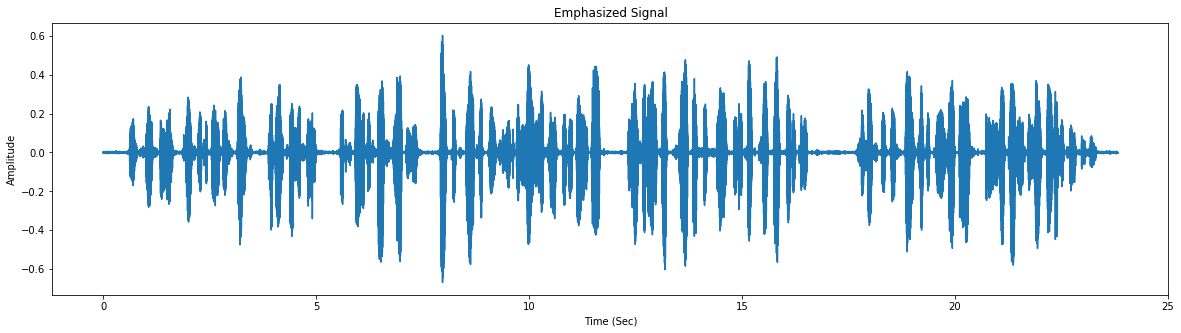

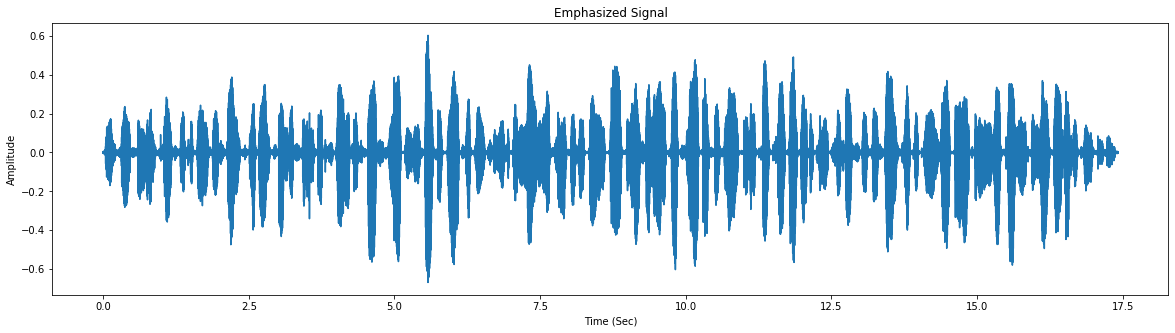

In [59]:
fname='english9.mp3'
y,sr=librosa.load(input_dir+fname)
Time=np.linspace(0, len(y)/22050, num=len(y))
plt.figure(figsize=(20,5))
plt.plot(Time,y)
plt.title('Emphasized Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.show()

y1 = librosa.effects.split(y,top_db=30)
l = []
for i in y1:
    l.append(y[i[0]:i[1]])
yo=np.concatenate(l,axis=0)
Time=np.linspace(0, len(yo)/22050, num=len(yo))
plt.figure(figsize=(20,5))
plt.plot(Time,yo)
plt.title('Emphasized Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.show()

#### Process all audios in the given directory

In [73]:
input_dir='recordings/selected_recordings/'
output_dir='recordings/silence_removed/'
silence_threshold=30

In [74]:
def remove_silence_and_save(fname,time_list=None):
    y,sr=librosa.load(input_dir+fname)
    y1 = librosa.effects.split(y,top_db=silence_threshold)
    l = []
    for i in y1:
        l.append(y[i[0]:i[1]])
    out_audio=np.concatenate(l,axis=0)
    time_list.append(np.linspace(0, len(out_audio)/22050, num=len(out_audio)))
    librosa.output.write_wav(output_dir+fname+'.wav',out_audio,22050)

In [75]:
time_list=[]

In [76]:
_=Parallel(n_jobs=12)(delayed(remove_silence_and_save)(fname,time_list) for fname in os.listdir(input_dir))

In [3]:
y_slow=librosa.effects.time_stretch(y,0.5)

In [16]:
os.path.isdir('recordings/recordings/')

True